In [65]:
import pandas_datareader.data as web
import numpy as np
import pandas as pd

In [66]:
df = web.DataReader(['AAPL', 'NKE', 'GOOGL', 'AMZN', 'BILI'], 'yahoo', start='2019/01/01', end='2021/01/15')
df = df['Adj Close']
df

Symbols,AAPL,NKE,GOOGL,AMZN,BILI
Date,,,,,
2019-01-02,38.562561,72.592087,1054.680054,1539.130005,14.280000
2019-01-03,34.721451,71.308044,1025.469971,1500.280029,12.950000
2019-01-04,36.203678,73.170387,1078.069946,1575.390015,13.700000
2019-01-07,36.123104,74.219170,1075.920044,1629.510010,14.270000
2019-01-08,36.811718,75.209160,1085.369995,1656.579956,14.780000
...,...,...,...,...,...
2021-01-11,128.979996,147.050003,1756.290039,3114.209961,112.470001
2021-01-12,128.800003,145.050003,1737.430054,3120.830078,115.440002
2021-01-13,130.889999,143.039993,1747.250000,3165.889893,119.309998


In [67]:
# Log of percentage change
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,AAPL,NKE,GOOGL,AMZN,BILI
Symbols,,,,,
AAPL,0.000568,0.000286,0.000340,0.000321,0.000320
NKE,0.000286,0.000421,0.000241,0.000163,0.000226
GOOGL,0.000340,0.000241,0.000403,0.000265,0.000236
AMZN,0.000321,0.000163,0.000265,0.000394,0.000249
BILI,0.000320,0.000226,0.000236,0.000249,0.001261


In [68]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,AAPL,NKE,GOOGL,AMZN,BILI
Symbols,,,,,
AAPL,1.000000,0.584647,0.709757,0.677936,0.377505
NKE,0.584647,1.000000,0.584029,0.401242,0.309862
GOOGL,0.709757,0.584029,1.000000,0.664884,0.330315
AMZN,0.677936,0.401242,0.664884,1.000000,0.353276
BILI,0.377505,0.309862,0.330315,0.353276,1.000000


In [69]:
w = {'AAPL': 0.1, 'NKE': 0.2, 'GOOGL': 0.2, 'AMZN': 0.2, 'BILI':0.2}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.0002658069034485945

In [70]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
AAPL     0.390620
NKE      0.202207
GOOGL    0.147130
AMZN     0.357841
BILI     2.017120
dtype: float64

In [84]:
# Portfolio returns
w = [0.2, 0.2, 0.2, 0.2, 0.2]
port_er = (w*ind_er).sum()
port_er

0.6229835911823988

In [72]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
AAPL     0.376837
NKE      0.324427
GOOGL    0.317539
AMZN     0.313693
BILI     0.561504
dtype: float64

In [73]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
AAPL,0.390620,0.376837
NKE,0.202207,0.324427
GOOGL,0.147130,0.317539
AMZN,0.357841,0.313693
BILI,2.017120,0.561504


In [74]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [75]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [76]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [77]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,AAPL weight,NKE weight,GOOGL weight,AMZN weight,BILI weight
0,0.578893,0.287674,0.256258,0.215382,0.144456,0.217199,0.166706
1,0.763159,0.294189,0.019400,0.251279,0.166182,0.274576,0.288563
2,0.648926,0.299976,0.274221,0.217263,0.236101,0.052043,0.220372
3,0.226506,0.286734,0.191679,0.417188,0.378019,0.008917,0.004197
4,0.737640,0.300642,0.183884,0.107129,0.207575,0.239743,0.261669


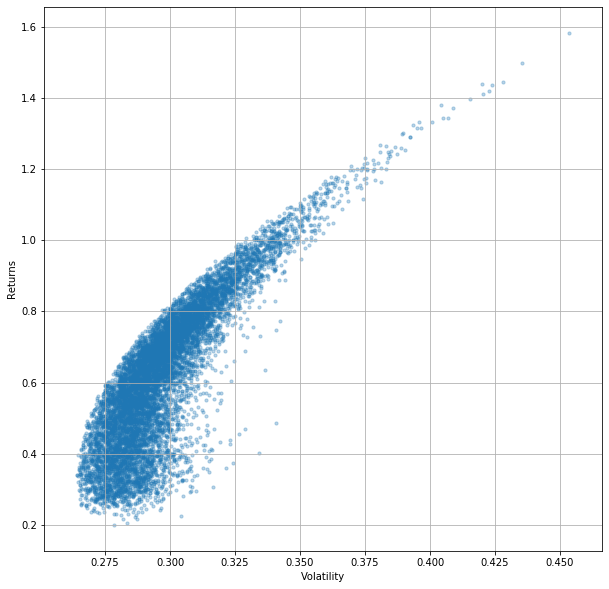

In [78]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [79]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.339854
Volatility      0.264171
AAPL weight     0.014952
NKE weight      0.396068
GOOGL weight    0.170492
AMZN weight     0.370823
BILI weight     0.047665
Name: 4065, dtype: float64

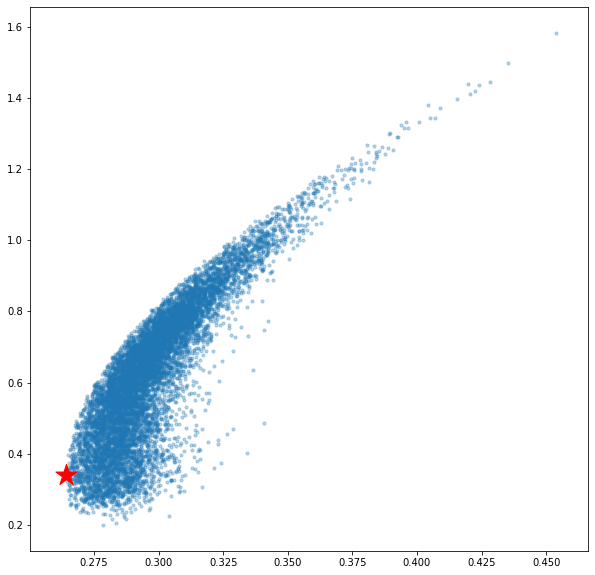

In [80]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [81]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         1.583749
Volatility      0.453642
AAPL weight     0.109089
NKE weight      0.043457
GOOGL weight    0.012445
AMZN weight     0.092689
BILI weight     0.742321
Name: 9222, dtype: float64

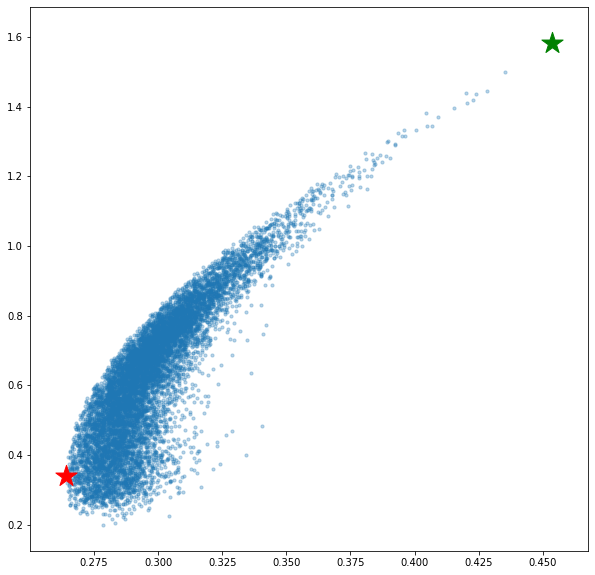

In [82]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

In [83]:
portfolios.sort_values(by=['Returns','Volatility'],ascending=[False, True])

,Returns,Volatility,AAPL weight,NKE weight,GOOGL weight,AMZN weight,BILI weight
9222,1.583749,0.453642,0.109089,0.043457,0.012445,0.092689,0.742321
3246,1.500200,0.435327,0.136173,0.015334,0.043491,0.112263,0.692738
5624,1.446818,0.428190,0.215847,0.045240,0.067267,0.006830,0.664817
6726,1.440966,0.419932,0.002199,0.002456,0.096978,0.233097,0.665270
7891,1.437265,0.423972,0.195047,0.015392,0.062669,0.070805,0.656087
...,...,...,...,...,...,...,...
8463,0.222642,0.286503,0.163929,0.241455,0.532120,0.056994,0.005502
8779,0.216124,0.287243,0.048924,0.591973,0.345716,0.000335,0.013052
1750,0.215459,0.281995,0.015402,0.520837,0.415978,0.032220,0.015563
1879,0.203744,0.283377,0.013082,0.501751,0.458069,0.014994,0.012104


In [2]:
import datetime as dt 
start, end  = dt.datetime(2018,1,1), dt.datetime(2021,1,15)
df = web.DataReader("AAPL","yahoo",start,end)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,43.075001,42.314999,42.540001,43.064999,102223600.0,41.442081
2018-01-03,43.637501,42.990002,43.132500,43.057499,118071600.0,41.434864
2018-01-04,43.367500,43.020000,43.134998,43.257500,89738400.0,41.627323
2018-01-05,43.842499,43.262501,43.360001,43.750000,94640000.0,42.101261
2018-01-08,43.902500,43.482498,43.587502,43.587502,82271200.0,41.944889
...,...,...,...,...,...,...
2021-01-11,130.169998,128.500000,129.190002,128.979996,100620900.0,128.979996
2021-01-12,129.690002,126.860001,128.500000,128.800003,91951100.0,128.800003
2021-01-13,131.449997,128.490005,128.759995,130.889999,88636800.0,130.889999


In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df['Close'],label = 'Adj Close')

C:\Users\suc002t\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


In [4]:
df= df["Adj Close"]
df

Date
2018-01-02     41.442081
2018-01-03     41.434864
2018-01-04     41.627323
2018-01-05     42.101261
2018-01-08     41.944889
                 ...    
2021-01-11    128.979996
2021-01-12    128.800003
2021-01-13    130.889999
2021-01-14    128.910004
2021-01-15    127.139999
Name: Adj Close, Length: 766, dtype: float64

In [5]:
train_size = int(len(df) * 0.6)
validation_size = int(len(df)*0.2)
train, validation, test = df[0:train_size],df[train_size:(train_size+validation_size)], df[(train_size+validation_size):len(df)]

In [6]:
train

Date
2018-01-02    41.442081
2018-01-03    41.434864
2018-01-04    41.627323
2018-01-05    42.101261
2018-01-08    41.944889
                ...    
2019-10-22    59.298336
2019-10-23    60.094048
2019-10-24    60.192894
2019-10-25    60.934254
2019-10-28    61.544628
Name: Adj Close, Length: 459, dtype: float64

In [7]:
validation

Date
2019-10-29    60.121231
2019-10-30    60.113815
2019-10-31    61.472961
2019-11-01    63.217617
2019-11-04    63.632767
                ...    
2020-06-02    80.550545
2020-06-03    80.993980
2020-06-04    80.296448
2020-06-05    82.583374
2020-06-08    83.071640
Name: Adj Close, Length: 153, dtype: float64

In [8]:
test

Date
2020-06-09     85.694878
2020-06-10     87.899590
2020-06-11     83.679497
2020-06-12     84.401947
2020-06-15     85.445755
                 ...    
2021-01-11    128.979996
2021-01-12    128.800003
2021-01-13    130.889999
2021-01-14    128.910004
2021-01-15    127.139999
Name: Adj Close, Length: 154, dtype: float64

In [9]:
print('Observations: %d' % (len(df)))
print('Training Observations: %d' % (len(train)))
print('Validation Observations: %d' % (len(validation)))
print('Testing Observations: %d' % (len(test)))

Observations: 766
Training Observations: 459
Validation Observations: 153
Testing Observations: 154


# Moving Average

In [10]:
type(train)

pandas.core.series.Series